In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
dfs=pd.read_csv('track_subscription_data.csv')
dfpp=pd.read_csv('user_purchase_data.csv')
dfq=pd.read_csv('user_quiz_attempt_data.csv')
dfsc=pd.read_csv('user_studycard_data.csv')
dfv=pd.read_csv('user_video_activity_data.csv')

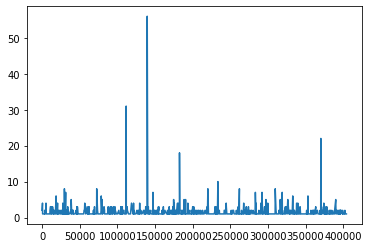

In [2]:

f=dfs.groupby('user_id').agg({'track_slug': ['count']})
plt.plot(f)


In [3]:
# unpaid users
dfj=dfpp.loc[dfpp.date_of_first_purhcase.isnull()].reset_index(drop=True)

dfj=dfj.filter(regex='(user_uid|date_joined)')


array([   608,   5243,  12749,  46198,  78626,  90705,  96798, 106598,
       137700, 190648, 220901, 244791, 267883, 274156, 342761, 374291],
      dtype=int64)

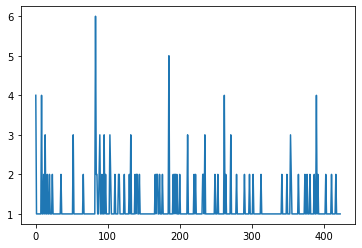

In [4]:
#16 unpaid users have a track_slug > 2
dfj=dfj.rename(columns={"user_uid":"user_id"})
dfjs=dfj.merge(dfs,on='user_id',how='left')
dfjs=dfjs.groupby(["user_id","date_joined"])["track_slug"].size().reset_index(name='Size')
plt.plot(dfjs.Size)
f=dfjs.loc[dfjs.Size>2]
f.user_id.unique()


In [5]:
# out of 576 joined users 478 turned into paid in one week

dfp=dfpp.loc[dfpp.date_of_first_purhcase.notnull()].reset_index(drop=True)

dfp=dfp.rename(columns={"user_uid":"user_id"})
dfp=dfp.merge(dfs)
start_date=pd.to_datetime(dfp['date_joined'])

end_date=start_date+pd.Timedelta(days=6)
dfp['end_date']=end_date
dfp.user_id.nunique()

#dfp.columns

576

In [6]:
dfp=dfp.loc[dfp['date_of_first_purhcase']<=dfp['end_date']]

dfp.user_id.nunique()

478

array([ 18663,  29712,  31373,  38705, 111765, 139721, 147358, 174794,
       182587, 220264, 233588, 262154, 283356, 316386, 319002, 326446,
       333016, 353235, 370221, 370323, 390115], dtype=int64)

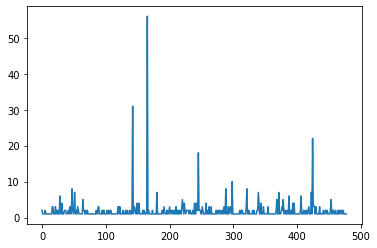

In [7]:
# 64 paid users have a track_slug > 2 and 21 user have a track_slug> 4

dfps=dfp.groupby(["user_id","date_joined"])["track_slug"].size().reset_index(name='Size')
plt.plot(dfps.Size)
g=dfps.loc[dfps.Size>4]
g.user_id.unique()

COMPLETE    13833
CREATE       6950
PAUSE         489
PROGRESS      147
Name: status, dtype: int64
630
126
     user_id    status  Size
0       1506    CREATE     1
1       1506     PAUSE     1
2       1796  COMPLETE     1
3       9331  COMPLETE     1
4       9331    CREATE     1
..       ...       ...   ...
229   393962  COMPLETE     1
230   393962    CREATE     1
231   396772  COMPLETE     1
232   396772    CREATE     1
233   400920    CREATE     1

[234 rows x 3 columns]
[183640 200545 230701 236083 282968 317685 362281 374291 379523]


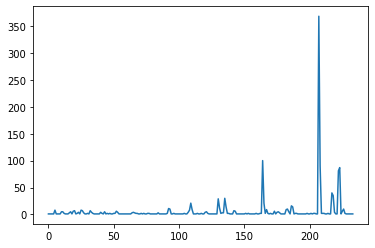

In [8]:
#out of 630 user attempted the quiz 126 are unpaid user ,and 56 users have attempted 
#the users more than once and 32 have attempted it more than twice & 9 of them more than 10 times
print(dfq['status'].value_counts())
print(dfq.groupby(["user_id","status"])["attempt_id"].size().reset_index(name='Size').user_id.nunique())

dfjq=dfq.merge(dfj,on='user_id',how='left')
unpaid=dfjq.dropna()
print(unpaid.user_id.nunique())
#list of unpaid users attempted the quiz
list_unpaid=unpaid.user_id.unique()
t=unpaid.groupby(["user_id","status"])["attempt_id"].size().reset_index(name='Size')
print(t)
plt.plot(t.Size)
f=t.loc[t.Size>10]
#list of unpaid users attempted the quiz = tf
tf=f.user_id.unique()
f.user_id.nunique()
#list of unpaid users attempted the quiz more than 10 times=9
print(tf)

In [9]:
watched_at=pd.to_datetime(dfv['watched_at'])

dfv['date']=watched_at.dt.date
dfv['date']=pd.to_datetime(dfv['date'])

In [10]:
start_date=pd.to_datetime(dfj['date_joined'])
end_date=start_date+pd.Timedelta(days=6)
dfv['end_date']=end_date

In [11]:
dfv=dfv.loc[dfv['date']<=dfv['end_date']]
dfv

,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,date,end_date
2,6,24011079,2021-06-04 18:27:01.296468+00:00,24920,1589,55,2021-06-04,2021-06-10
3,6,24011800,2021-06-04 18:51:27.450857+00:00,24531,319,28,2021-06-04,2021-06-10
4,6,24249571,2021-06-08 11:19:02.187747+00:00,32825,317,15,2021-06-08,2021-06-10
6,6,24487133,2021-06-11 18:10:55.176817+00:00,25840,1251,17,2021-06-11,2021-06-11
7,6,24487136,2021-06-11 18:10:58.296319+00:00,25841,1826,1,2021-06-11,2021-06-11
...,...,...,...,...,...,...,...,...
419,6323,26920147,2021-07-25 06:23:35.103433+00:00,6853,704,0,2021-07-25,2021-08-08
420,6323,24048228,2021-06-05 10:45:41.389610+00:00,5860,1032,1032,2021-06-05,2021-08-08
421,6323,24047726,2021-06-05 10:38:58.267544+00:00,5859,369,369,2021-06-05,2021-08-08
422,6323,24753939,2021-06-16 05:26:30.122661+00:00,5870,955,955,2021-06-16,2021-08-08


array([   6, 1831, 2610, 3418, 3421, 3439, 3464, 3664, 5201, 5243, 5609,
       6190, 6323], dtype=int64)

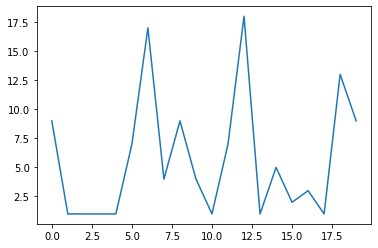

In [12]:
# in 7 days after joining 7 users have watched the 80 % of the vedios more than once
features=dfv.groupby('user_id')['date'].nunique().reset_index().rename(columns={'date':'Size_7_Days'})

features['Size_7_Days']=features['Size_7_Days'].fillna(0)
plt.plot(features.Size_7_Days)
g=features.loc[features.Size_7_Days>1]
g.user_id.unique()

In [13]:
dfv=dfv.merge(features,on='user_id',how='left')

In [14]:
#12 unique users have watched the 80% of the vedio
dfv.user_id.nunique()

20

In [15]:
dfv=dfv.loc[(dfv['watched_duration']>=.8*dfv['duration'])]

In [16]:
dfv.drop_duplicates()


,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,date,end_date,Size_7_Days
11,6,24192841,2021-06-07 14:42:09.156320+00:00,24688,1706,1402,2021-06-07,2021-06-13,9
15,6,24424110,2021-06-10 18:24:49.636961+00:00,24865,1969,1884,2021-06-10,2021-06-14,9
16,6,24552968,2021-06-12 18:30:06.474527+00:00,38016,507,507,2021-06-12,2021-06-14,9
17,6,24076979,2021-06-05 18:29:41.182395+00:00,25413,2026,1945,2021-06-05,2021-06-14,9
18,6,24553784,2021-06-12 18:55:59.162422+00:00,25414,1210,1210,2021-06-12,2021-06-14,9
...,...,...,...,...,...,...,...,...,...
289,6323,24298665,2021-06-09 06:07:12.333717+00:00,5867,690,690,2021-06-09,2021-08-08,9
291,6323,24048228,2021-06-05 10:45:41.389610+00:00,5860,1032,1032,2021-06-05,2021-08-08,9
292,6323,24047726,2021-06-05 10:38:58.267544+00:00,5859,369,369,2021-06-05,2021-08-08,9
293,6323,24753939,2021-06-16 05:26:30.122661+00:00,5870,955,955,2021-06-16,2021-08-08,9


In [17]:
dfv.groupby('user_id')['date'].nunique().reset_index()

,user_id,date
0,6,5
1,635,1
2,1512,1
3,1831,5
4,2610,17
5,3418,2
6,3421,2
7,3439,3
8,3464,4
9,3664,15


In [18]:
dfj.columns

Index(['user_id', 'date_joined'], dtype='object')

In [19]:
start_date=pd.to_datetime(dfj['date_joined'])
dfv['start_date']=start_date

In [20]:
end_date=start_date+pd.Timedelta(days=6)
dfv['end_date']=pd.to_datetime(end_date)

In [21]:
watched_at=pd.to_datetime(dfv['watched_at'])

date=watched_at.dt.date
dfv['date']=pd.to_datetime(date)
        

In [22]:
dfvj=dfv.loc[(dfv['date'] >=dfv['start_date'])&(dfv['date'] <dfv['end_date'])]

        

In [23]:
dfvj=dfvj.loc[(dfvj['watched_duration']>=.3*dfvj['duration'])]
        

features=dfvj.groupby('user_id')['date'].nunique().reset_index().rename(columns={'date':'Size_7_Days'})

features['Size_7_Days']=features['Size_7_Days'].fillna(0)

In [24]:
#features=features.merge(dfvj.groupby(['user_id']).size().unstack().fillna(0).reset_index()


In [25]:

dfvj=dfvj.merge(features,on='user_id',how='left')
dfvj=dfvj.fillna(0)
dfvj.drop_duplicates() 
dfvj.filter(regex='(user_id|Size_7_Days|watched_duration)')

,user_id,watched_duration,Size_7_Days_x,Size_7_Days_y
0,6,1402,9,4
1,6,1884,9,4
2,6,507,9,4
3,6,1210,9,4
4,6,2005,9,4
5,6,1846,9,4
6,6,1812,9,4
7,6,928,9,4
8,6,910,9,4
9,2610,708,17,9


In [56]:
# 3 users have watched 30 % of vedio more than once .And user with ID 2610 have watched it 22 times
#and he is a paid user

print(dfvj.user_id.value_counts())
s=dfp.loc[dfp.user_id==2610]
s

2610    22
6        9
3664     4
3464     1
6323     1
Name: user_id, dtype: int64


,user_id,date_joined,date_of_first_purhcase,track_slug,subscription_date,end_date
4,2610,2021-06-05,2021-06-05,Spoken_eng_hindi,2021-06-05,2021-06-11


In [27]:
dfsc.head()

,user_id,activity_id,start_time
0,1642,4197126,2021-06-04 16:51:51.454473+00:00
1,1642,4197075,2021-06-04 16:43:10.115201+00:00
2,1642,4197074,2021-06-04 16:43:10.082261+00:00
3,1642,4197577,2021-06-04 18:20:58.487196+00:00
4,1642,4197174,2021-06-04 16:57:46.487970+00:00


In [28]:
for v, data in dfq.groupby('status'):
  data.to_csv("{}.csv".format(v))

In [29]:
dfqc=pd.read_csv('COMPLETE.csv')
dfqc.user_id.nunique()

528

array([     6,   2610,   3439,   3664,   7102,   8062,  15431,  19117,
        20740,  21760,  26580,  27946,  28487,  31373,  34271,  38599,
        39651,  41706,  43158,  56741,  61874,  69406,  73700,  87284,
        89201,  91932, 103374, 111765, 111882, 113055, 136944, 141215,
       144412, 144826, 154908, 175451, 178088, 178241, 182587, 188711,
       193673, 201710, 213215, 229734, 241728, 244599, 259160, 282968,
       292188, 333016, 333562, 337722, 338577, 362281, 379523, 397309],
      dtype=int64)

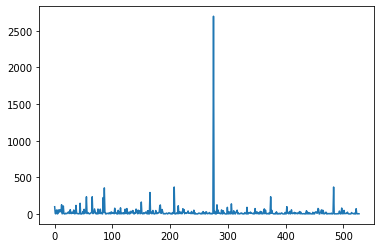

In [31]:
# out of 526 quiz completed users ,56 users have completed the quiz more than 50 times,& their ids are in g50
h=dfqc.groupby(["user_id","status"])["attempt_id"].size().reset_index(name='Size')
#print(h)

dfjh=h.merge(dfj,on='user_id',how='left')
dfjhd=dfjh.dropna()
plt.plot(h.Size)
g=h.loc[h.Size>50]
g.user_id.nunique()
g50=g.user_id.unique()
g50

In [40]:
dfsc.columns

Index(['user_id', 'activity_id', 'start_time', 'date_joined',
       'date_of_first_purhcase', 'track_slug', 'subscription_date',
       'end_date'],
      dtype='object')

In [43]:
s=pd.to_datetime(dfsc['start_time'])
dfsc['date']=s.dt.date
dfsc['date']=pd.to_datetime(dfsc['date'])

start_date=pd.to_datetime(dfj['date_joined'])
dfj['start_date']=start_date

In [44]:
end_date=start_date+pd.Timedelta(days=6)
dfj['end_date']=pd.to_datetime(end_date)


In [34]:
# in the 900 purchases 473 are unique ID 
#dfsc=pd.merge(dfsc,dfp,on='user_id',how='left')
dfp.user_id.nunique()

478

In [35]:
 #dfsc=dfsc.merge(dfj,on='user_id',how='left')

In [36]:
dfsc.user_id.value_counts()

#dfsc.user_id.nunique()

28487     69
89201     65
2610      51
229734    45
61874     44
          ..
228147     2
229717     2
204454     2
178088     2
126073     2
Name: user_id, Length: 386, dtype: int64

In [37]:
start_date=pd.to_datetime(dfp['date_of_first_purhcase'])
dfp['date_of_first_purhcase']=start_date
end_date=start_date+pd.Timedelta(days=6)
dfp['end_date']=pd.to_datetime(end_date)
dfp=dfp.loc[dfp['date_of_first_purhcase']<=dfp['end_date']]


In [38]:
dfsc=dfsc.merge(dfp,on='user_id',how='left')

In [45]:
dfsc.user_id.value_counts()

182587    450
28487     207
284306    136
229734    135
61874     132
         ... 
108923      2
141215      2
147198      2
332293      2
72616       2
Name: user_id, Length: 386, dtype: int64

In [46]:
dfsc=dfsc.loc[(dfsc['date'] <dfsc['end_date'])]

     user_id        track_slug  Size
0       1642  Spoken_eng_hindi     8
1       2610  Spoken_eng_hindi    17
2       3421  Spoken_eng_hindi     5
3       3439             TNPSC     2
4       6190  Spoken_eng_hindi    18
..       ...               ...   ...
409   396335  Spoken_eng_hindi     3
410   399226  Spoken_eng_hindi     4
411   399353  Spoken_eng_hindi     3
412   404095  Spoken_eng_hindi    10
413   404277  Spoken_eng_hindi     2

[414 rows x 3 columns]


[2610,
 6190,
 25313,
 48595,
 61874,
 69176,
 81042,
 88653,
 102410,
 176077,
 182587,
 183157,
 241728,
 258726,
 284306,
 324841,
 336975,
 338577,
 381478,
 385786]

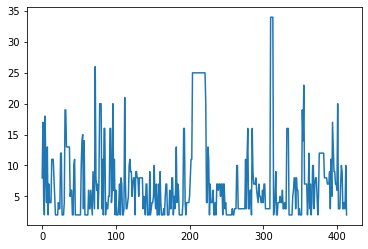

In [58]:
# out of 414 unique user ID ,124 have track Size 124 and 20 have track size 15 and their ids are in g6
h=dfsc.groupby(["user_id","track_slug"])["activity_id"].size().reset_index(name='Size')
print(h)
plt.plot(h.Size)
g=h.loc[h.Size>15]
g.user_id.nunique()
g6=g.user_id.unique()
g6=g6.tolist()


ValueError: ('Lengths must match to compare', (900,), (20,))